In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load your datasets
team_stats_df = pd.read_csv('team_stats_0423_sorted.csv')
standings_df = pd.read_csv('NBA_Standings_Ranked_Classes.csv')
elo_df = pd.read_csv('elo_ratings_per_year.csv')
four_factors_df = pd.read_csv('team_year_avg_four_factors.csv')

# Merge the Elo ratings into your team stats dataset
team_stats_df = pd.merge(team_stats_df, elo_df[['Year', 'Team', 'Elo Rating']], how='left', on=['Year', 'Team'])

# Merge the new features into your team stats dataset
team_stats_df = pd.merge(team_stats_df, four_factors_df[['Year', 'Team', 'eFG%', 'TOV%', 'ORB%', 'FT_Rate']], how='left', on=['Year', 'Team'])

# Merge the team stats with the updated standings data
merged_data = pd.merge(team_stats_df, standings_df, how='left', on=['Year', 'Team'])

# Ensure all necessary columns are available before creating new features
required_columns = ['ORtg', 'DRtg', 'W', 'L']
missing_columns = [col for col in required_columns if col not in merged_data.columns]

if missing_columns:
    print(f"Missing columns for feature creation: {missing_columns}")
else:
    # Create new features
    merged_data['Net_Rating'] = merged_data['ORtg'] - merged_data['DRtg']
    merged_data['Win_Loss_Ratio'] = merged_data['W'] / merged_data['L']

# Filter the data by year range
filtered_data = merged_data[merged_data['Year'] >= 2004]

# Select the relevant features for training
features = ['Elo Rating', 'eFG%', 'TOV%', 'ORB%', 'FT_Rate', 'Net_Rating', 'Win_Loss_Ratio']

# Function to train and evaluate for different windows
def train_and_evaluate_yearly(conference_data, start_year, end_year, model):
    train_data = conference_data[(conference_data['Year'] >= start_year) & (conference_data['Year'] < end_year)]
    test_data = conference_data[conference_data['Year'] == end_year]
    
    X_train = train_data[features]
    y_train = train_data['ranking_class']

    X_test = test_data[features]
    y_test = test_data['ranking_class']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy




C:\Users\janmi\AppData\Local\Temp\ipykernel_11048\1526163438.py:12: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  team_stats_df = pd.read_csv('team_stats_0423_sorted.csv')


In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load your datasets
team_stats_df = pd.read_csv('team_stats_0423_sorted.csv')
standings_df = pd.read_csv('NBA_Standings_Ranked_Classes.csv')
elo_df = pd.read_csv('elo_ratings_per_year.csv')
four_factors_df = pd.read_csv('team_year_avg_four_factors.csv')

# Merge the Elo ratings into your team stats dataset
team_stats_df = pd.merge(team_stats_df, elo_df[['Year', 'Team', 'Elo Rating']], how='left', on=['Year', 'Team'])

# Merge the new features into your team stats dataset
team_stats_df = pd.merge(team_stats_df, four_factors_df[['Year', 'Team', 'eFG%', 'TOV%', 'ORB%', 'FT_Rate']], how='left', on=['Year', 'Team'])

# Merge the team stats with the updated standings data
merged_data = pd.merge(team_stats_df, standings_df, how='left', on=['Year', 'Team'])

# Ensure all necessary columns are available before creating new features
required_columns = ['ORtg', 'DRtg', 'W', 'L']
missing_columns = [col for col in required_columns if col not in merged_data.columns]

if missing_columns:
    print(f"Missing columns for feature creation: {missing_columns}")
else:
    # Create new features
    merged_data['Net_Rating'] = merged_data['ORtg'] - merged_data['DRtg']
    merged_data['Win_Loss_Ratio'] = merged_data['W'] / merged_data['L']

# Filter the data by year range
filtered_data = merged_data[merged_data['Year'] >= 2004]

# Select the relevant features for training
features = ['Elo Rating', 'eFG%', 'TOV%', 'ORB%', 'FT_Rate', 'Net_Rating', 'Win_Loss_Ratio']

# Function to train and evaluate for different windows
def train_and_evaluate_yearly(conference_data, start_year, end_year, model):
    train_data = conference_data[(conference_data['Year'] >= start_year) & (conference_data['Year'] < end_year)]
    test_data = conference_data[conference_data['Year'] == end_year]
    
    X_train = train_data[features]
    y_train = train_data['ranking_class']

    X_test = test_data[features]
    y_test = test_data['ranking_class']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# List of models to evaluate
models = {
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "kNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

# Store results
results_summary = []

# Iterate over the years using different data windows
for window_size in [7]:
    for year in range(2008, 2023):
        eastern_data = filtered_data[filtered_data['Conference'] == 'Eastern Conference']
        western_data = filtered_data[filtered_data['Conference'] == 'Western Conference']

        for model_name, model in models.items():
            # Evaluate for Eastern Conference
            eastern_accuracy = train_and_evaluate_yearly(eastern_data, year - window_size, year, model)
            
            # Evaluate for Western Conference
            western_accuracy = train_and_evaluate_yearly(western_data, year - window_size, year, model)
            
            # Store results
            results_summary.append({
                "Year": year,
                "Window_Size": window_size,
                "Model": model_name,
                "Eastern_Accuracy": eastern_accuracy,
                "Western_Accuracy": western_accuracy
            })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results_summary)

# Group by model and window size, then calculate the mean accuracy
grouped_results = results_df.groupby(['Model', 'Window_Size']).mean()[['Eastern_Accuracy', 'Western_Accuracy']]

# Print the summary of results
print(grouped_results)

# Determine and print the best window size for each model
for model_name in models.keys():
    best_window = grouped_results.loc[model_name].mean(axis=1).idxmax()
    print(f"The optimal window size for {model_name} is {best_window} years.")


C:\Users\janmi\AppData\Local\Temp\ipykernel_11048\2266921830.py:10: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  team_stats_df = pd.read_csv('team_stats_0423_sorted.csv')
C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

                                    Eastern_Accuracy  Western_Accuracy
Model                  Window_Size                                    
DecisionTree           7                    0.773663          0.696930
GradientBoosting       7                    0.786337          0.750143
LogisticRegression     7                    0.843599          0.808320
RandomForestClassifier 7                    0.798038          0.736795
SVM                    7                    0.709317          0.725077
kNN                    7                    0.642570          0.646404
The optimal window size for GradientBoosting is 7 years.
The optimal window size for LogisticRegression is 7 years.
The optimal window size for kNN is 7 years.
The optimal window size for DecisionTree is 7 years.
The optimal window size for SVM is 7 years.
The optimal window size for RandomForestClassifier is 7 years.


In [10]:
# Function to train and evaluate for different windows
def train_and_evaluate_yearly(conference_data, start_year, end_year, model):
    train_data = conference_data[(conference_data['Year'] >= start_year) & (conference_data['Year'] < end_year)]
    test_data = conference_data[conference_data['Year'] == end_year]
    
    X_train = train_data[features]
    y_train = train_data['ranking_class']

    X_test = test_data[features]
    y_test = test_data['ranking_class']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Train and Test Accuracy after model training
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    # Check for overfitting
    if train_accuracy > test_accuracy + 0.05:  # Example threshold
        print("The model is likely overfitting.")
    else:
        print("The model is not overfitting.")

    return accuracy

# List of models to evaluate
models = {
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "kNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

# Store results
results_summary = []

# Iterate over the years using different data windows
for window_size in [7]:
    for year in range(2008, 2023):
        eastern_data = filtered_data[filtered_data['Conference'] == 'Eastern Conference']
        western_data = filtered_data[filtered_data['Conference'] == 'Western Conference']

        for model_name, model in models.items():
            # Evaluate for Eastern Conference
            print(f"Evaluating {model_name} for Eastern Conference in Year {year}")
            eastern_accuracy = train_and_evaluate_yearly(eastern_data, year - window_size, year, model)
            
            # Evaluate for Western Conference
            print(f"Evaluating {model_name} for Western Conference in Year {year}")
            western_accuracy = train_and_evaluate_yearly(western_data, year - window_size, year, model)
            
            # Store results
            results_summary.append({
                "Year": year,
                "Window_Size": window_size,
                "Model": model_name,
                "Eastern_Accuracy": eastern_accuracy,
                "Western_Accuracy": western_accuracy
            })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results_summary)

# Group by model and window size, then calculate the mean accuracy
grouped_results = results_df.groupby(['Model', 'Window_Size']).mean()[['Eastern_Accuracy', 'Western_Accuracy']]

# Print the summary of results
print(grouped_results)

# Determine and print the best window size for each model
for model_name in models.keys():
    best_window = grouped_results.loc[model_name].mean(axis=1).idxmax()
    print(f"The optimal window size for {model_name} is {best_window} years.")


Evaluating GradientBoosting for Eastern Conference in Year 2008
Training Accuracy: 1.0
Test Accuracy: 0.8
The model is likely overfitting.
Evaluating GradientBoosting for Western Conference in Year 2008
Training Accuracy: 1.0
Test Accuracy: 0.6666666666666666
The model is likely overfitting.
Evaluating LogisticRegression for Eastern Conference in Year 2008


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8789872408293461
Test Accuracy: 0.8959349593495934
The model is not overfitting.
Evaluating LogisticRegression for Western Conference in Year 2008


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8974878444084279
Test Accuracy: 0.6658536585365854
The model is likely overfitting.
Evaluating kNN for Eastern Conference in Year 2008
Training Accuracy: 0.94896331738437
Test Accuracy: 0.7097560975609756
The model is likely overfitting.
Evaluating kNN for Western Conference in Year 2008
Training Accuracy: 0.9651539708265803
Test Accuracy: 0.5349593495934959
The model is likely overfitting.
Evaluating DecisionTree for Eastern Conference in Year 2008
Training Accuracy: 1.0
Test Accuracy: 0.8
The model is likely overfitting.
Evaluating DecisionTree for Western Conference in Year 2008
Training Accuracy: 1.0
Test Accuracy: 0.6
The model is likely overfitting.
Evaluating SVM for Eastern Conference in Year 2008
Training Accuracy: 0.6987639553429027
Test Accuracy: 0.8666666666666667
The model is not overfitting.
Evaluating SVM for Western Conference in Year 2008
Training Accuracy: 0.7627633711507293
Test Accuracy: 0.6666666666666666
The model is likely overfitting.
Evalua

KeyboardInterrupt: 

In [12]:
# Function to train and evaluate for a specific window and year 7 years
def train_and_evaluate_yearly(merged_data, start_year, end_year, model):
    train_data = merged_data[(merged_data['Year'] >= start_year) & (merged_data['Year'] < end_year)]
    test_data = merged_data[merged_data['Year'] == end_year]
    
    X_train = train_data[features]
    y_train = train_data['ranking_class']

    X_test = test_data[features]
    y_test = test_data['ranking_class']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Train and Test Accuracy after model training
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    # Check for overfitting
    if train_accuracy > test_accuracy + 0.05:  # Example threshold
        print("The model is likely overfitting.")
    else:
        print("The model is not overfitting.")

    return accuracy

# Define the specific case: 7-year window and 2023
window_size = 7
year = 2023

# Combine Eastern and Western Conference data
combined_data = filtered_data[(filtered_data['Year'] >= year - window_size) & (filtered_data['Year'] <= year)]

# Test with the optimal models
for model_name, model in models.items():
    # Evaluate for the combined data
    print(f"Evaluating {model_name} for the Year {year} with a {window_size}-year window")
    overall_accuracy = train_and_evaluate_yearly(combined_data, year - window_size, year, model)
    
    # Store results
    result_summary = {
        "Year": year,
        "Window_Size": window_size,
        "Model": model_name,
        "Overall_Accuracy": overall_accuracy
    }

    # Print the result summary for this specific case
    print(f"Results for {model_name}: {result_summary}")


Evaluating GradientBoosting for the Year 2023 with a 7-year window
Training Accuracy: 1.0
Test Accuracy: 0.7333333333333333
The model is likely overfitting.
Results for GradientBoosting: {'Year': 2023, 'Window_Size': 7, 'Model': 'GradientBoosting', 'Overall_Accuracy': 0.7333333333333333}
Evaluating LogisticRegression for the Year 2023 with a 7-year window


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8311014597659548
Test Accuracy: 0.8666666666666667
The model is not overfitting.
Results for LogisticRegression: {'Year': 2023, 'Window_Size': 7, 'Model': 'LogisticRegression', 'Overall_Accuracy': 0.8666666666666667}
Evaluating kNN for the Year 2023 with a 7-year window
Training Accuracy: 0.9241162987091326
Test Accuracy: 0.5853658536585366
The model is likely overfitting.
Results for kNN: {'Year': 2023, 'Window_Size': 7, 'Model': 'kNN', 'Overall_Accuracy': 0.5853658536585366}
Evaluating DecisionTree for the Year 2023 with a 7-year window
Training Accuracy: 1.0
Test Accuracy: 0.7333333333333333
The model is likely overfitting.
Results for DecisionTree: {'Year': 2023, 'Window_Size': 7, 'Model': 'DecisionTree', 'Overall_Accuracy': 0.7333333333333333}
Evaluating SVM for the Year 2023 with a 7-year window
Training Accuracy: 0.7323561346362649
Test Accuracy: 0.7182926829268292
The model is not overfitting.
Results for SVM: {'Year': 2023, 'Window_Size': 7, 'Model': 'SVM'

In [18]:
# Function to train and evaluate for a specific window and year
def train_and_evaluate_yearly(merged_data, start_year, end_year, model):
    train_data = merged_data[(merged_data['Year'] >= start_year) & (merged_data['Year'] < end_year)]
    test_data = merged_data[merged_data['Year'] == end_year]
    
    X_train = train_data[features]
    y_train = train_data['ranking_class']

    X_test = test_data[features]
    y_test = test_data['ranking_class']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Train and Test Accuracy after model training
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    # Check for overfitting
    if train_accuracy > test_accuracy + 0.05:  # Example threshold
        print("The model is likely overfitting.")
    else:
        print("The model is not overfitting.")

    return accuracy

# Define the specific case: 7-year window and 2023
window_size = 7
year = 2008

# Combine Eastern and Western Conference data
combined_data = filtered_data[(filtered_data['Year'] >= year - window_size) & (filtered_data['Year'] <= year)]

# Test with the optimal models
for model_name, model in models.items():
    # Evaluate for the combined data
    print(f"Evaluating {model_name} for the Year {year} with a {window_size}-year window")
    overall_accuracy = train_and_evaluate_yearly(combined_data, year - window_size, year, model)
    
    # Store results
    result_summary = {
        "Year": year,
        "Window_Size": window_size,
        "Model": model_name,
        "Overall_Accuracy": overall_accuracy
    }

    # Print the result summary for this specific case
    print(f"Results for {model_name}: {result_summary}")


Evaluating GradientBoosting for the Year 2008 with a 7-year window
Training Accuracy: 1.0
Test Accuracy: 0.6666666666666666
The model is likely overfitting.
Results for GradientBoosting: {'Year': 2008, 'Window_Size': 7, 'Model': 'GradientBoosting', 'Overall_Accuracy': 0.6666666666666666}
Evaluating LogisticRegression for the Year 2008 with a 7-year window


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7642684887459807
Test Accuracy: 0.6857723577235773
The model is likely overfitting.
Results for LogisticRegression: {'Year': 2008, 'Window_Size': 7, 'Model': 'LogisticRegression', 'Overall_Accuracy': 0.6857723577235773}
Evaluating kNN for the Year 2008 with a 7-year window
Training Accuracy: 0.927652733118971
Test Accuracy: 0.6272357723577235
The model is likely overfitting.
Results for kNN: {'Year': 2008, 'Window_Size': 7, 'Model': 'kNN', 'Overall_Accuracy': 0.6272357723577235}
Evaluating DecisionTree for the Year 2008 with a 7-year window
Training Accuracy: 1.0
Test Accuracy: 0.5666666666666667
The model is likely overfitting.
Results for DecisionTree: {'Year': 2008, 'Window_Size': 7, 'Model': 'DecisionTree', 'Overall_Accuracy': 0.5666666666666667}
Evaluating SVM for the Year 2008 with a 7-year window
Training Accuracy: 0.6505225080385852
Test Accuracy: 0.7
The model is not overfitting.
Results for SVM: {'Year': 2008, 'Window_Size': 7, 'Model': 'SVM', 'Overall_Ac

In [15]:
def train_and_evaluate_yearly(merged_data, start_year, end_year, model):
    train_data = merged_data[(merged_data['Year'] >= start_year) & (merged_data['Year'] < end_year)]
    test_data = merged_data[merged_data['Year'] == end_year]
    
    X_train = train_data[features]
    y_train = train_data['ranking_class']

    X_test = test_data[features]
    y_test = test_data['ranking_class']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Train and Test Accuracy after model training
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    # Check for overfitting
    if train_accuracy > test_accuracy + 0.05:  # Example threshold
        print("The model is likely overfitting.")
    else:
        print("The model is not overfitting.")

    return accuracy, X_train, y_train


Evaluating GradientBoosting for the Year 2023 with a 7-year window
Training Accuracy: 1.0
Test Accuracy: 0.7333333333333333
The model is likely overfitting.
Generating learning curve for GradientBoosting


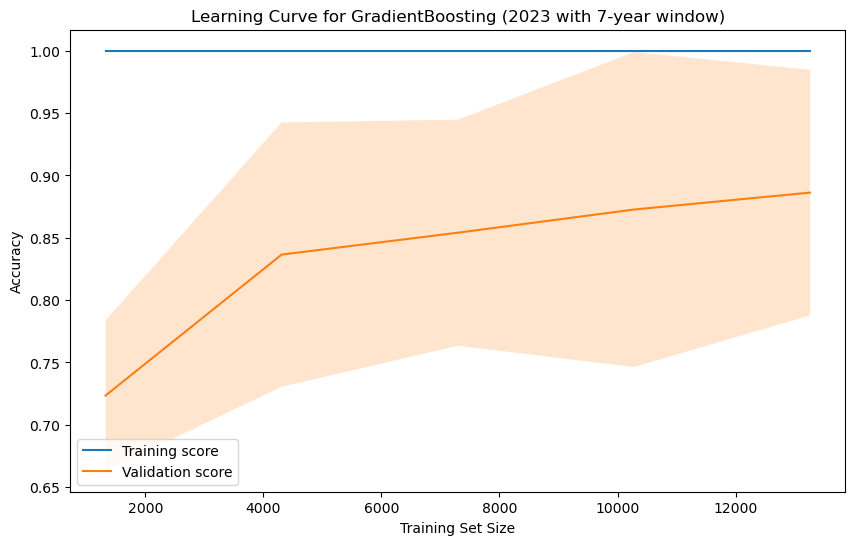

Evaluating LogisticRegression for the Year 2023 with a 7-year window


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8311014597659548
Test Accuracy: 0.8666666666666667
The model is not overfitting.
Generating learning curve for LogisticRegression


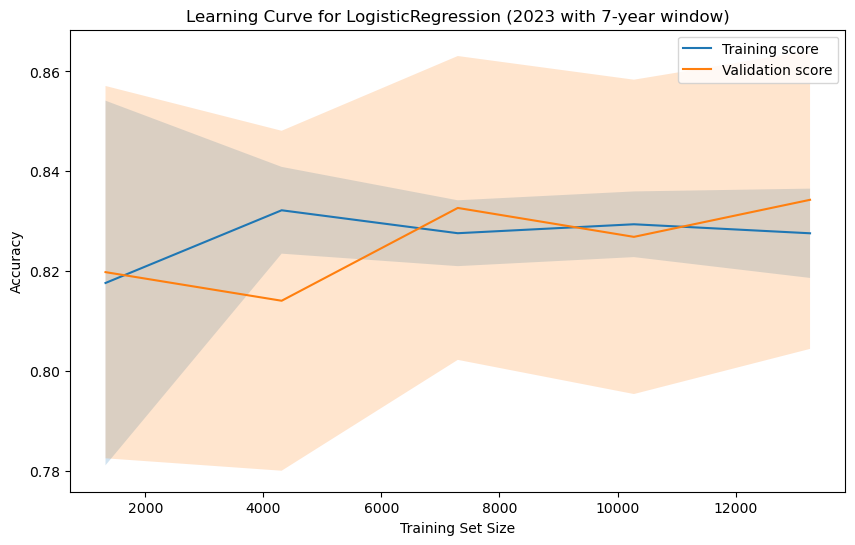

Evaluating kNN for the Year 2023 with a 7-year window
Training Accuracy: 0.9241162987091326
Test Accuracy: 0.5853658536585366
The model is likely overfitting.
Generating learning curve for kNN


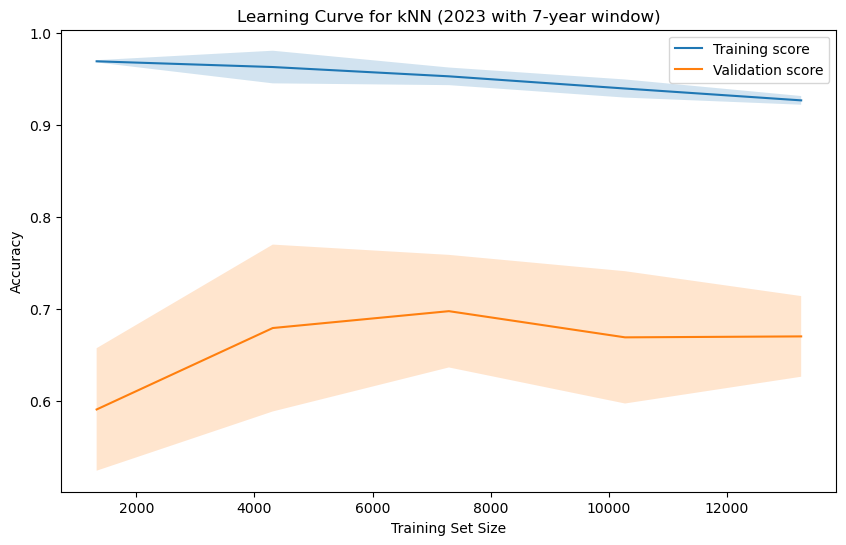

Evaluating DecisionTree for the Year 2023 with a 7-year window
Training Accuracy: 1.0
Test Accuracy: 0.7333333333333333
The model is likely overfitting.
Generating learning curve for DecisionTree


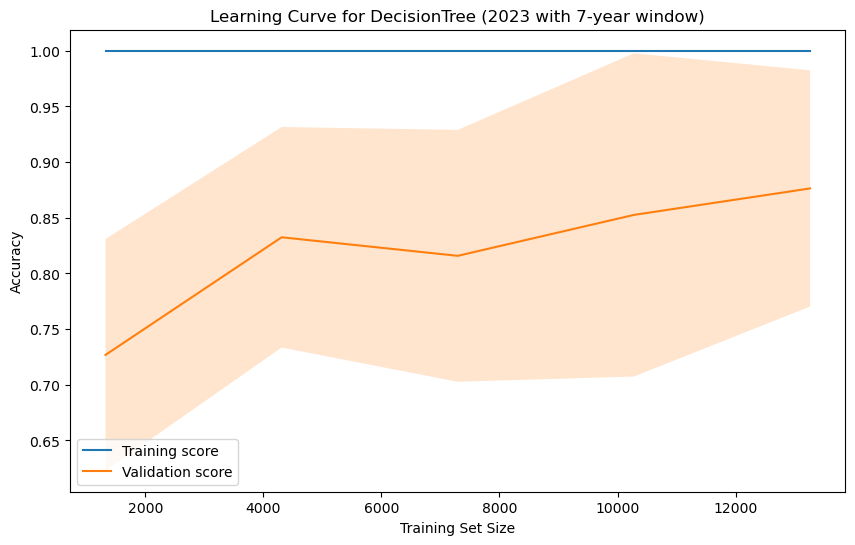

Evaluating SVM for the Year 2023 with a 7-year window
Training Accuracy: 0.7323561346362649
Test Accuracy: 0.7182926829268292
The model is not overfitting.
Generating learning curve for SVM


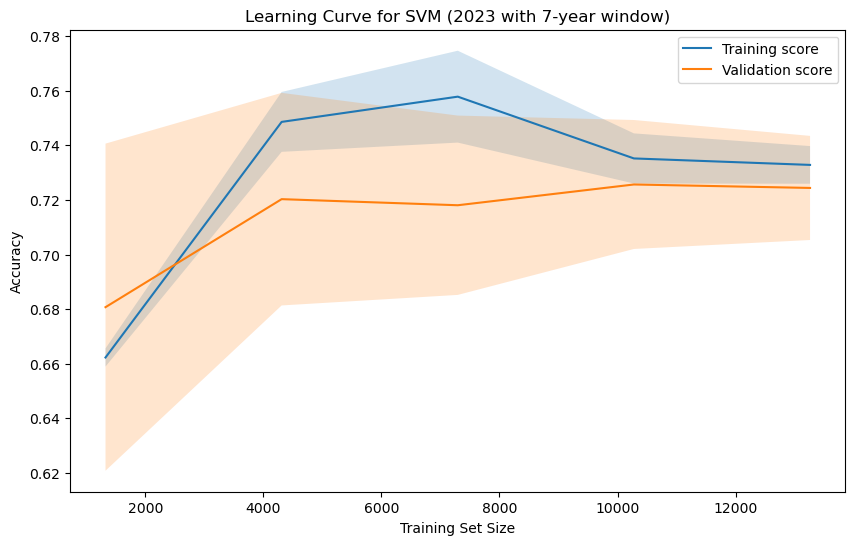

Evaluating RandomForestClassifier for the Year 2023 with a 7-year window
Training Accuracy: 1.0
Test Accuracy: 0.7666666666666667
The model is likely overfitting.
Generating learning curve for RandomForestClassifier


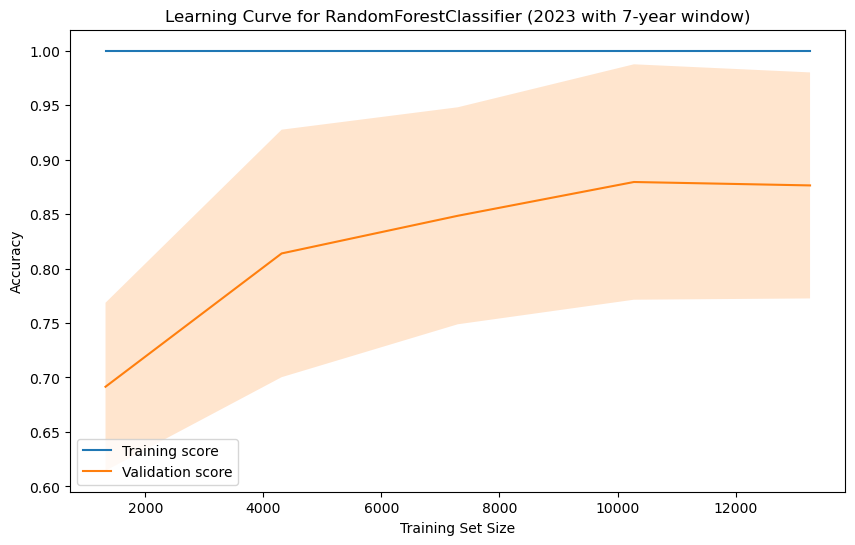

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Define the specific case: 7-year window and 2023
window_size = 7
year = 2023

# Combine Eastern and Western Conference data
combined_data = filtered_data[(filtered_data['Year'] >= year - window_size) & (filtered_data['Year'] <= year)]

# Test with the optimal models
for model_name, model in models.items():
    # Evaluate for the combined data
    print(f"Evaluating {model_name} for the Year {year} with a {window_size}-year window")
    overall_accuracy, X_train, y_train = train_and_evaluate_yearly(combined_data, year - window_size, year, model)
    
    # Generate learning curves
    print(f"Generating learning curve for {model_name}")
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Calculate mean and standard deviation for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Validation score')

    # Plot the variance as a shaded area
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    plt.title(f'Learning Curve for {model_name} ({year} with {window_size}-year window)')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()


Training Accuracy: 1.0
Test Accuracy: 0.7333333333333333
The model is likely overfitting.


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8311014597659548
Test Accuracy: 0.8666666666666667
The model is not overfitting.
Training Accuracy: 0.9241162987091326
Test Accuracy: 0.5853658536585366
The model is likely overfitting.
Training Accuracy: 1.0
Test Accuracy: 0.7333333333333333
The model is likely overfitting.
Training Accuracy: 0.7323561346362649
Test Accuracy: 0.7182926829268292
The model is not overfitting.
Training Accuracy: 1.0
Test Accuracy: 0.7666666666666667
The model is likely overfitting.


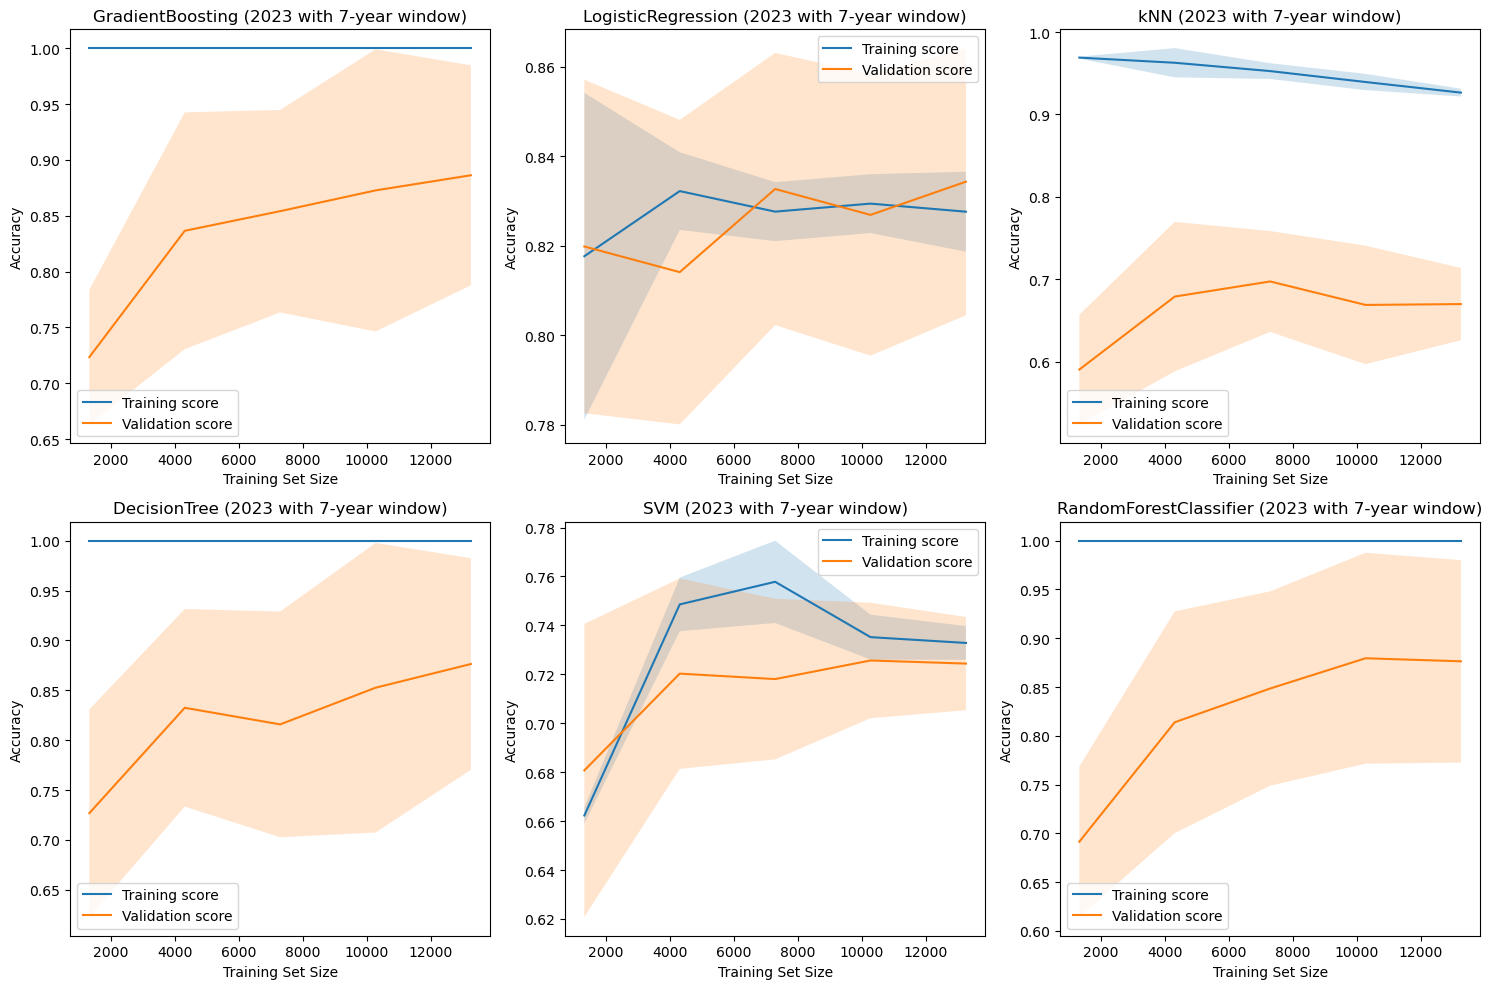

In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Define the specific case: 7-year window and 2023
window_size = 7
year = 2023

# Combine Eastern and Western Conference data
combined_data = filtered_data[(filtered_data['Year'] >= year - window_size) & (filtered_data['Year'] <= year)]

# Set up the subplot grid; adjust rows and cols based on the number of models
num_models = len(models)
cols = 3  # Number of columns (adjust as needed)
rows = (num_models + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily iterate through

# Test with the optimal models
for i, (model_name, model) in enumerate(models.items()):
    # Evaluate for the combined data
    overall_accuracy, X_train, y_train = train_and_evaluate_yearly(combined_data, year - window_size, year, model)
    
    # Generate learning curves
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Calculate mean and standard deviation for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve on the respective subplot
    axes[i].plot(train_sizes, train_mean, label='Training score')
    axes[i].plot(train_sizes, test_mean, label='Validation score')
    
    # Plot the variance as a shaded area
    axes[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    axes[i].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
    
    axes[i].set_title(f'{model_name} ({year} with {window_size}-year window)')
    axes[i].set_xlabel('Training Set Size')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend(loc='best')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [23]:
def train_and_evaluate_yearly(merged_data, start_year, end_year, model):
    train_data = merged_data[(merged_data['Year'] >= start_year) & (merged_data['Year'] < end_year)]
    test_data = merged_data[merged_data['Year'] == end_year]
    
    X_train = train_data[features]
    y_train = train_data['ranking_class']

    X_test = test_data[features]
    y_test = test_data['ranking_class']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Train and Test Accuracy after model training
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    # Check for overfitting
    if train_accuracy > test_accuracy + 0.05:  # Example threshold
        print("The model is likely overfitting.")
    else:
        print("The model is not overfitting.")

    return accuracy, X_train, y_train


In [24]:
# Test with the optimal models
for model_name, model in models.items():
    # Evaluate for the combined data
    print(f"Evaluating {model_name} for the Year {year} with a {window_size}-year window")
    overall_accuracy, X_train, y_train = train_and_evaluate_yearly(combined_data, year - window_size, year, model)
    
    # Perform 5-fold cross-validation
    print(f"Performing 5-fold cross-validation for {model_name}")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Print the cross-validation scores and the mean score
    print(f"Cross-validation scores for {model_name}: {cv_scores}")
    print(f"Mean CV Score for {model_name}: {np.mean(cv_scores)}\n")


Evaluating GradientBoosting for the Year 2023 with a 7-year window
Training Accuracy: 1.0
Test Accuracy: 0.7333333333333333
The model is likely overfitting.
Performing 5-fold cross-validation for GradientBoosting
Cross-validation scores for GradientBoosting: [0.82689988 1.         0.85162847 0.98129713 0.75263952]
Mean CV Score for GradientBoosting: 0.8824929997980447

Evaluating LogisticRegression for the Year 2023 with a 7-year window


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8311014597659548
Test Accuracy: 0.8666666666666667
The model is not overfitting.
Performing 5-fold cross-validation for LogisticRegression


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validation scores for LogisticRegression: [0.7907117  0.8513269  0.82509047 0.87993967 0.79245852]
Mean CV Score for LogisticRegression: 0.8279054522430667

Evaluating kNN for the Year 2023 with a 7-year window
Training Accuracy: 0.9241162987091326
Test Accuracy: 0.5853658536585366
The model is likely overfitting.
Performing 5-fold cross-validation for kNN
Cross-validation scores for kNN: [0.65651387 0.74457177 0.65199035 0.68386124 0.61206637]
Mean CV Score for kNN: 0.6698007193969728

Evaluating DecisionTree for the Year 2023 with a 7-year window
Training Accuracy: 1.0
Test Accuracy: 0.7333333333333333
The model is likely overfitting.
Performing 5-fold cross-validation for DecisionTree
Cross-validation scores for DecisionTree: [0.85162847 1.         0.7774427  1.         0.75263952]
Mean CV Score for DecisionTree: 0.8763421374859679

Evaluating SVM for the Year 2023 with a 7-year window
Training Accuracy: 0.7323561346362649
Test Accuracy: 0.7182926829268292
The model is not ove